# Housing Price Predictor using Machine Learning Algorithms

In this notebook, we will build a predictive model to estimate housing prices using various machine learning algorithms. The steps involved in this process include:

1. **Data Collection and Preprocessing**:
    - Load the dataset
    - Handle missing values
    - Perform exploratory data analysis (EDA)
    - Encode categorical variables
    - Scale numerical features

2. **Feature Selection**:
    - Identify relevant features
    - Use techniques like correlation matrix, feature importance, etc.

3. **Model Selection**:
    - Choose appropriate machine learning algorithms (e.g., Linear Regression, Decision Trees, Random Forest, Gradient Boosting, etc.)

4. **Model Training**:
    - Split the dataset into training and testing sets
    - Train the models using the training set

5. **Model Evaluation**:
    - Evaluate the models using metrics like Mean Absolute Error (MAE), Mean Squared Error (MSE), Root Mean Squared Error (RMSE), R² score, etc.
    - Compare the performance of different models

6. **Hyperparameter Tuning**:
    - Optimize the model parameters using techniques like Grid Search, Random Search, or Bayesian Optimization

7. **Model Deployment**:
    - Save the best performing model
    - Create a simple user interface for predicting house prices based on user inputs

## Libraries and Tools

To implement the above steps, we will use the following libraries and tools:
- **Pandas**: For data manipulation and analysis
- **NumPy**: For numerical computations
- **Matplotlib & Seaborn**: For data visualization
- **Scikit-learn**: For machine learning algorithms and model evaluation
- **Jupyter Notebook**: For interactive coding and documentation

## Dataset

The dataset used in this project contains various features related to houses, such as the number of bedrooms, bathrooms, square footage, location, etc., along with the corresponding prices. The dataset can be obtained from public sources like Kaggle, UCI Machine Learning Repository, or any other real estate data providers.

## Objective

The primary objective of this project is to develop a robust and accurate model that can predict the prices of houses based on their features. This can help potential buyers and sellers make informed decisions in the real estate market.

Let's get started!

## Step 1: Data Collection and Preprocessing

In this step, we will focus on acquiring the dataset and preparing it for analysis. Proper data preprocessing is crucial for building an effective predictive model. The tasks involved in this step are:

### 1.1 Load the Dataset
- **Description**: Import the dataset into the environment. This can be done using libraries like Pandas to read data from CSV files, databases, or other data sources.
- **Objective**: Ensure that the dataset is successfully loaded and ready for further processing.

### 1.2 Handle Missing Values
- **Description**: Identify and handle any missing or null values in the dataset. This can be done through various strategies such as removing rows with missing values, imputing with mean/median/mode, or using more advanced techniques.
- **Objective**: Ensure the dataset is complete and does not have any gaps that could negatively impact the model’s performance.

### 1.3 Perform Exploratory Data Analysis (EDA)
- **Description**: Conduct a thorough analysis of the dataset to understand the distribution and relationships of the features. This includes generating summary statistics, visualizing data distributions, and identifying patterns or anomalies.
- **Objective**: Gain insights into the data, which can help in making informed decisions during feature selection and model building.

### 1.4 Encode Categorical Variables
- **Description**: Convert categorical variables into numerical format using techniques like one-hot encoding, label encoding, or binary encoding. This step is essential because most machine learning algorithms require numerical input.
- **Objective**: Transform categorical data into a format suitable for model training.

### 1.5 Scale Numerical Features
- **Description**: Normalize or standardize numerical features to ensure that they have a consistent scale. Common techniques include Min-Max scaling and Standard scaling.
- **Objective**: Improve the performance of the machine learning algorithms by ensuring that features contribute equally to the distance calculations.

By the end of Step 1, we should have a clean, well-structured dataset that is ready for feature selection and model training. This foundational work is crucial for building an accurate and reliable housing price predictor.

                                         BROKERTITLE                TYPE  \
0        Brokered by Douglas Elliman  -111 Fifth Ave      Condo for sale   
1                                Brokered by Serhant      Condo for sale   
2                             Brokered by Sowae Corp      House for sale   
3                                Brokered by COMPASS      Condo for sale   
4  Brokered by Sotheby's International Realty - E...  Townhouse for sale   

       PRICE  BEDS       BATH  PROPERTYSQFT  \
0     315000     2   2.000000        1400.0   
1  195000000     7  10.000000       17545.0   
2     260000     4   2.000000        2015.0   
3      69000     3   1.000000         445.0   
4   55000000     7   2.373861       14175.0   

                                             ADDRESS                    STATE  \
0                               2 E 55th St Unit 803       New York, NY 10022   
1  Central Park Tower Penthouse-217 W 57th New Yo...       New York, NY 10019   
2                

C:\Users\librarypc\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


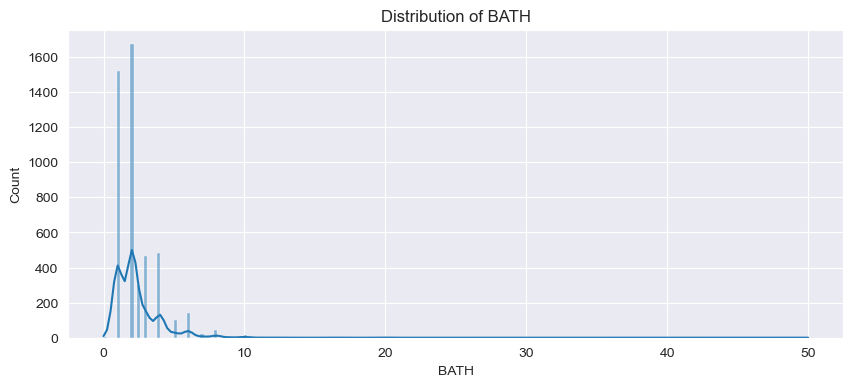

C:\Users\librarypc\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


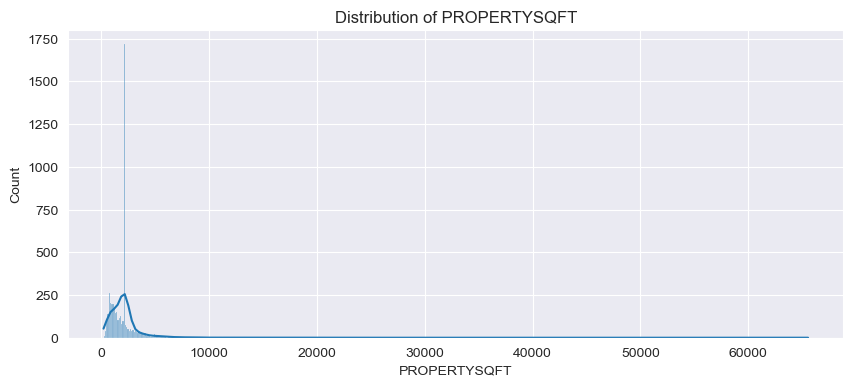

C:\Users\librarypc\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


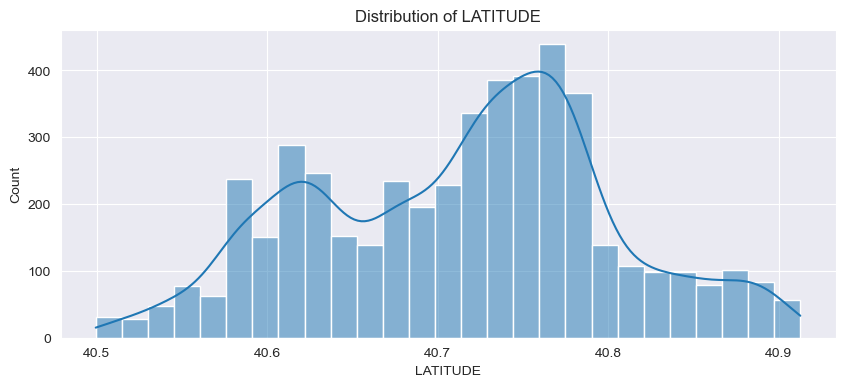

C:\Users\librarypc\miniconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


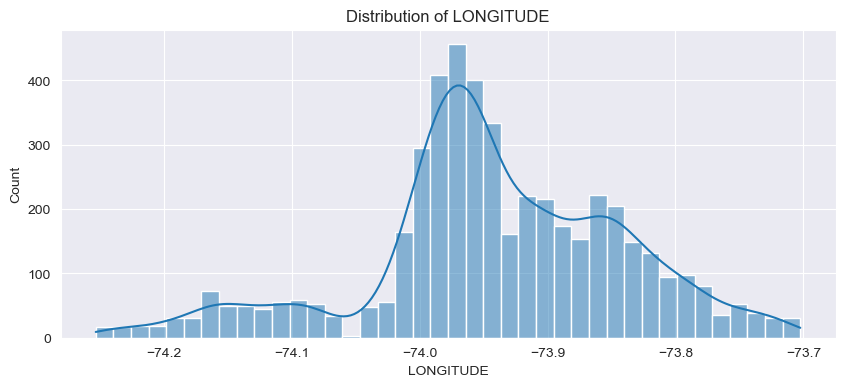

C:\Users\librarypc\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 65533 (\N{REPLACEMENT CHARACTER}) missing from current font.
  fig.canvas.print_figure(bytes_io, **kw)


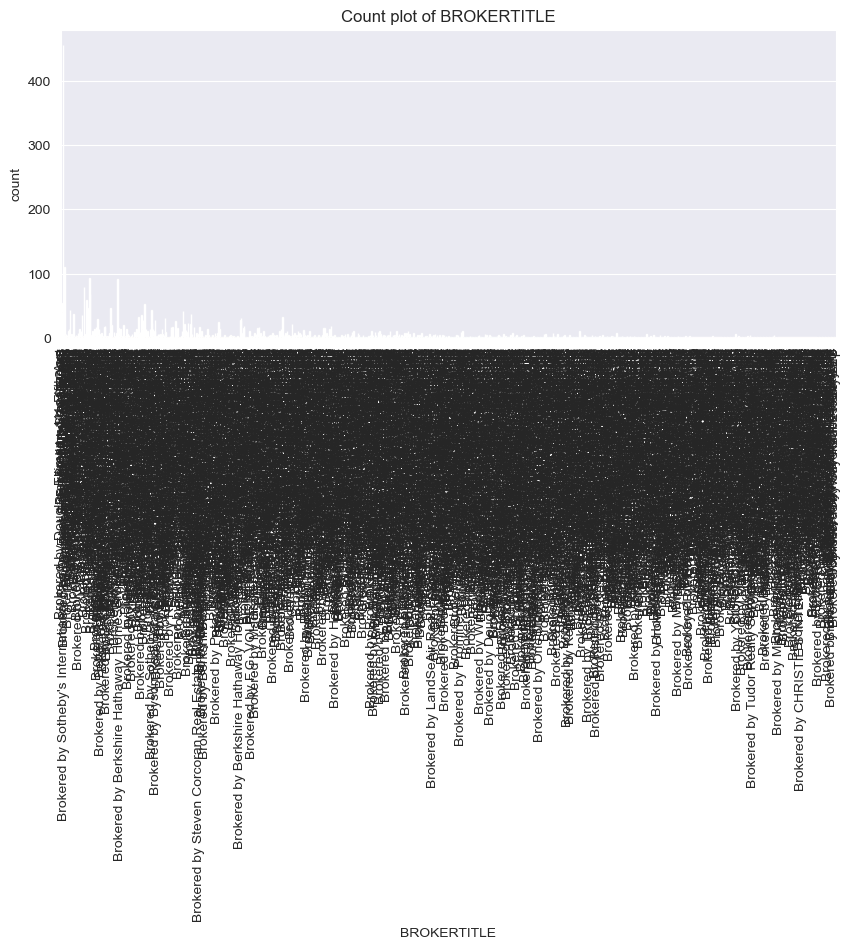

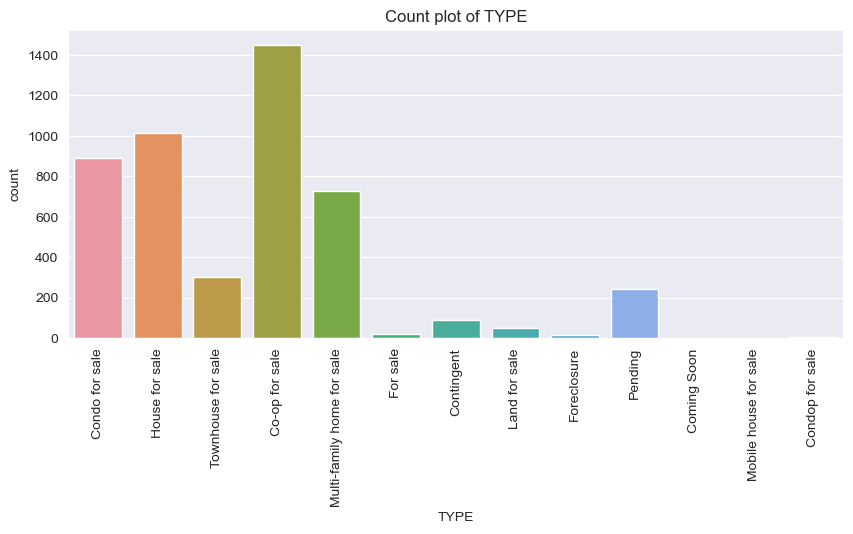

In [ ]:
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

# Load dataset
dataset = pd.read_csv("NY-House-Dataset.csv")
print(dataset.head(5))
print(dataset.shape)

# Identify categorical and numerical columns
obj = (dataset.dtypes == 'object')
object_cols = list(obj[obj].index)
print("Categorical variables:", len(object_cols))

int_ = (dataset.dtypes == 'int')
num_cols = list(int_[int_].index)
print("Integer variables:", len(num_cols))

fl = (dataset.dtypes == 'float')
fl_cols = list(fl[fl].index)
print("Float variables:", len(fl_cols))

# Handling missing values
# For simplicity, we will drop rows with missing values
dataset = dataset.dropna()
print("Dataset shape after dropping missing values:", dataset.shape)

# Exploratory Data Analysis (EDA)
# Visualizing distributions of numerical features
for col in num_cols + fl_cols:
    plt.figure(figsize=(10, 4))
    sns.histplot(dataset[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

# Visualizing categorical variables
for col in object_cols:
    plt.figure(figsize=(10, 4))
    sns.countplot(x=col, data=dataset)
    plt.title(f'Count plot of {col}')
    plt.xticks(rotation=90)
    plt.show()

# Encoding categorical variables
label_encoders = {}
for col in object_cols:
    le = LabelEncoder()
    dataset[col] = le.fit_transform(dataset[col])
    label_encoders[col] = le

print(dataset.head(5))

# Scaling numerical features
scaler = StandardScaler()
dataset[num_cols + fl_cols] = scaler.fit_transform(dataset[num_cols + fl_cols])

print(dataset.head(5))

# Splitting the dataset into training and testing sets
X = dataset.drop('target_column', axis=1)  # Replace 'target_column' with the actual target column name
y = dataset['target_column']  # Replace 'target_column' with the actual target column name

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training set shape:", X_train.shape)
print("Testing set shape:", X_test.shape)


In [ ]:
housing_dataset.shape()